In [1]:
import pandas as pd
import numpy as np
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# for scientific and statistical computing
import scipy as sp
#To make working with geospatial data in python easier
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
plt.style.use('ggplot')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/kaggle/input/Electric-vehicle-population-data-washington-us/Electric_Vehicle_Population_Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv("/kaggle/input/electric-vehicle-population-data-washington-us/Electric_Vehicle_Population_Data.csv")
display(df.head())
display(df.shape)
display(df.columns)
display(df.info())
display(df.isna().sum())
display(df.describe())

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10


(121978, 17)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121978 entries, 0 to 121977
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         121978 non-null  object 
 1   County                                             121976 non-null  object 
 2   City                                               121976 non-null  object 
 3   State                                              121978 non-null  object 
 4   Postal Code                                        121976 non-null  float64
 5   Model Year                                         121978 non-null  int64  
 6   Make                                               121978 non-null  object 
 7   Model                                              121874 non-null  object 
 8   Electric Vehicle Type                              121978 non-null  object

None

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                104
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      32
Electric Utility                                     469
2020 Census Tract                                      2
dtype: int64

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,121976.000000,121978.00000,121978.000000,121978.000000,121681.000000,1.219780e+05,1.219760e+05
mean,98159.128451,2019.30890,81.301407,1627.059798,29.738760,2.029409e+08,5.297007e+10
std,2602.756790,2.95635,100.890849,10267.478923,14.737141,8.979138e+07,1.659161e+09
min,1730.000000,1997.00000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.00000,0.000000,0.000000,18.000000,1.523397e+08,5.303301e+10
50%,98121.000000,2020.00000,25.000000,0.000000,34.000000,1.967532e+08,5.303303e+10
75%,98370.000000,2022.00000,200.000000,0.000000,43.000000,2.258338e+08,5.305307e+10
max,99701.000000,2023.00000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


<AxesSubplot:>

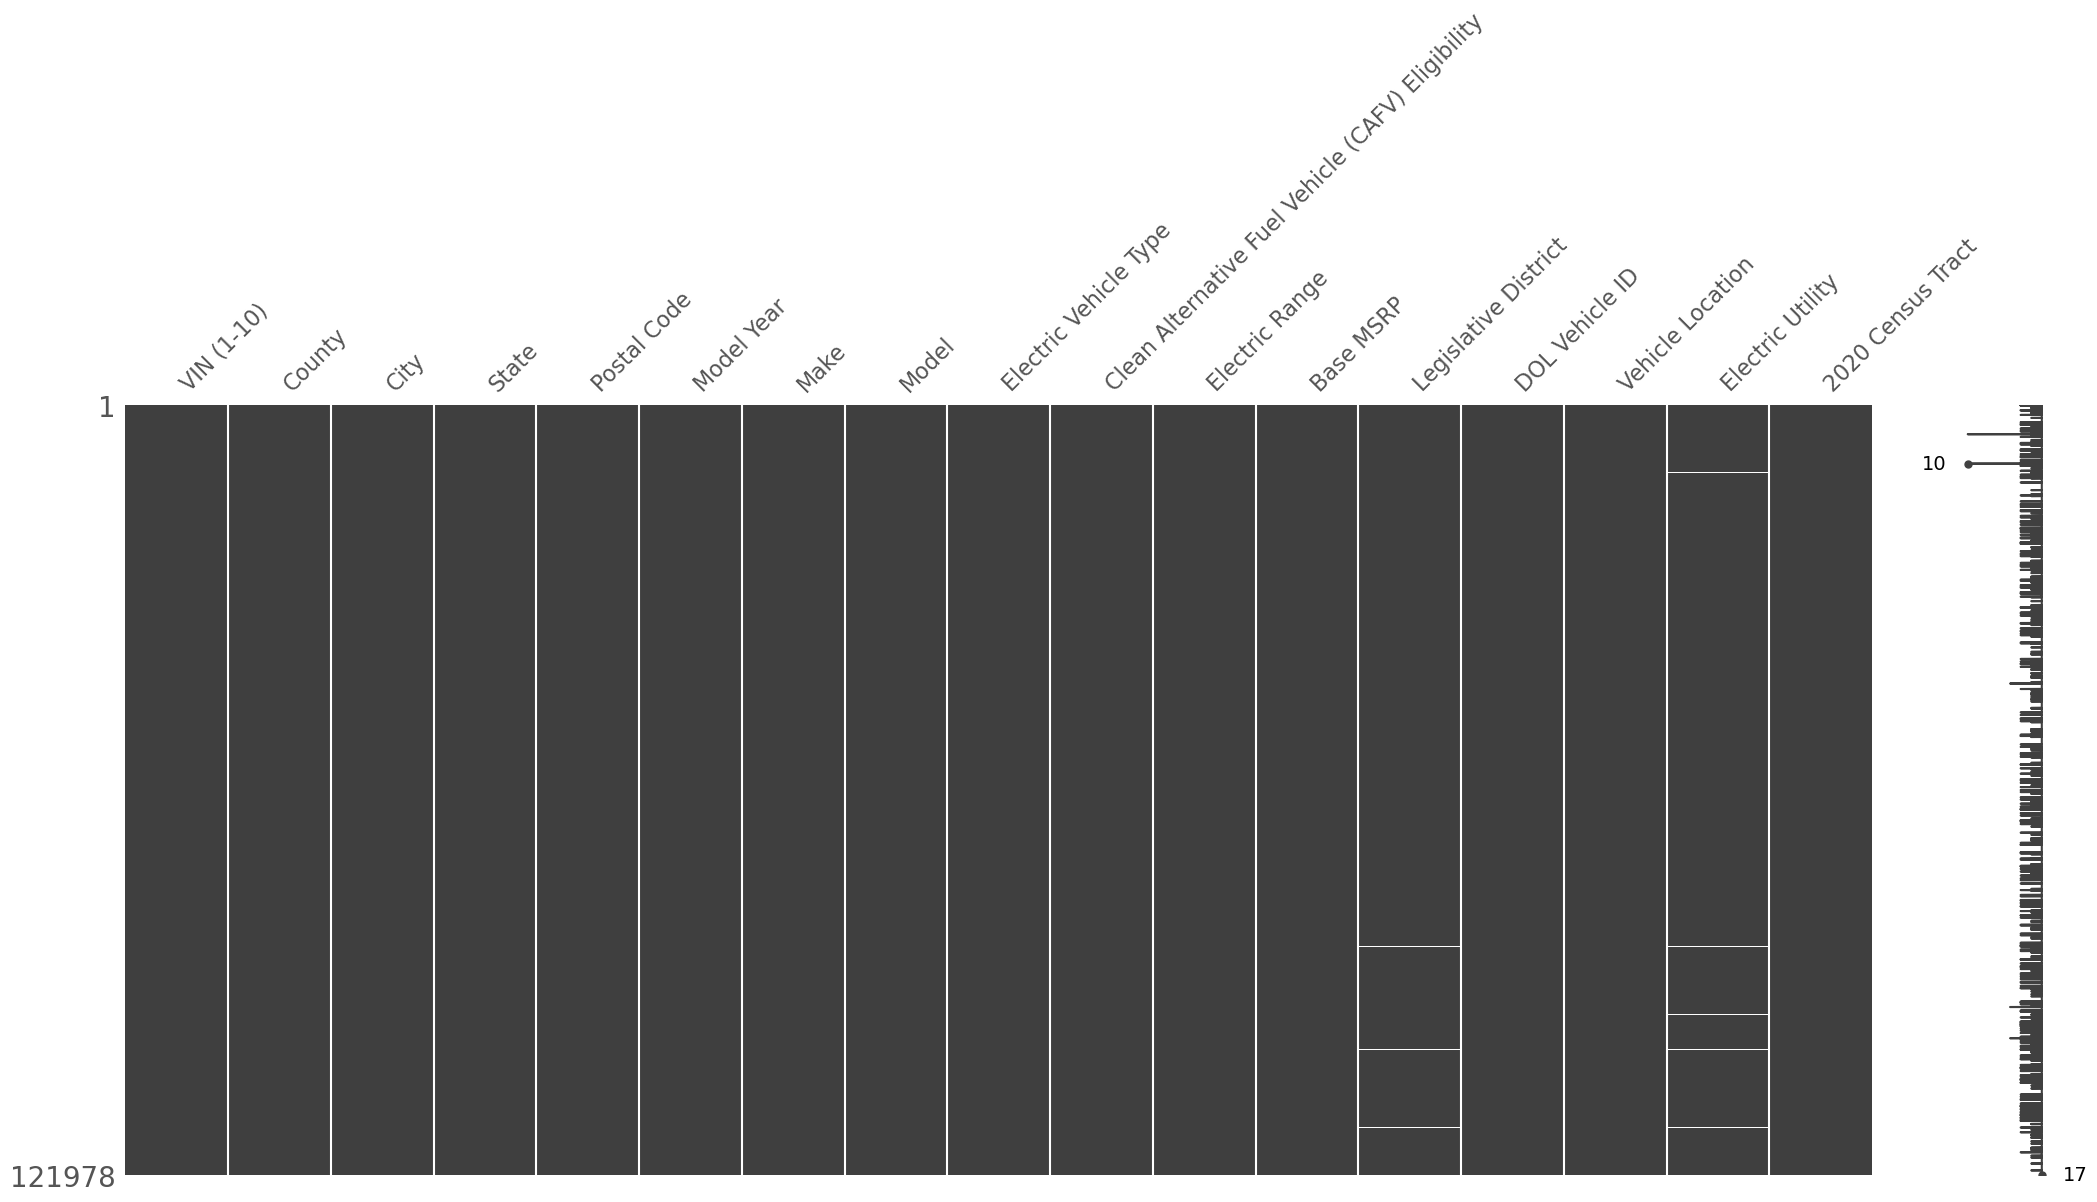

In [4]:
import missingno 
missingno.matrix(df)

In [5]:
# Count the number of unique values in each column
num_counties = df["County"].nunique()
num_cities = df["City"].nunique()
num_states = df["State"].nunique()

# Print the results
print("Number of unique counties:", num_counties)
print("Number of unique cities:", num_cities)
print("Number of unique states:", num_states)

Number of unique counties: 167
Number of unique cities: 647
Number of unique states: 44


In [6]:
#print sum and values of categorical DAta
#define categorical columns
columns_cat = [ 'County', 'City', 'State','Make', 'Model','Electric Vehicle Type',
                'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility']
#print
for i in columns_cat:
    print(i)
    print("****")
    print('unique: ', df.loc[:,i].unique())
    print('unique sum: ', len(df.loc[:,i].unique()))
    print("****************************************************************************************")

County
****
unique:  ['Suffolk' 'Yakima' 'Danville' 'Norfolk' 'Thurston' 'Snohomish' 'King'
 'Kittitas' 'Chelan' 'Kitsap' 'Skagit' 'DeKalb' 'Grant' 'Garfield'
 'Walla Walla' 'Whitman' 'Island' 'Oldham' 'Santa Cruz' 'Douglas'
 'Honolulu' 'Spokane' 'Stevens' 'Rock Island' 'Howard' 'Clark' 'Pierce'
 'Whatcom' 'Cowlitz' 'Klickitat' 'Benton' 'Skamania' 'Clallam' 'San Juan'
 'Franklin' 'Pacific' 'Jefferson' 'Mason' 'Lewis' 'Asotin' 'Grays Harbor'
 'Calvert' 'San Bernardino' 'Pend Oreille' 'Okanogan' 'Adams' 'Fairfax'
 'Columbia' 'Bexar' 'Monterey' 'District of Columbia' 'San Diego' 'Ferry'
 'Wahkiakum' 'Okaloosa' nan 'Sedgwick' 'El Paso' 'St. Clair' 'New London'
 'Randolph' 'Salt Lake' 'Cumberland' 'Monroe' 'Chesapeake' 'Los Angeles'
 'Santa Clara' 'Orange' 'Lincoln' 'Kern' 'Contra Costa' 'Camden' 'Vernon'
 'Frederick' 'Carroll' 'Maricopa' 'Newport News' 'Cape May' 'Bell'
 'Laramie' 'Sarpy' 'Alexandria' 'St. Louis' 'Riverside' 'Coryell'
 "St. Mary's" 'Cook' 'Anne Arundel' 'Sonoma' 'Arapahoe'

In [7]:
# Filter the data for electric vehicles
electric_vehicles = df[df['Electric Vehicle Type'].isin(['BEV', 'PHEV'])]

# Group the data by county, city, and state and count the number of vehicles in each group
counts = electric_vehicles.groupby(['County', 'City', 'State']).size().reset_index(name='Count')

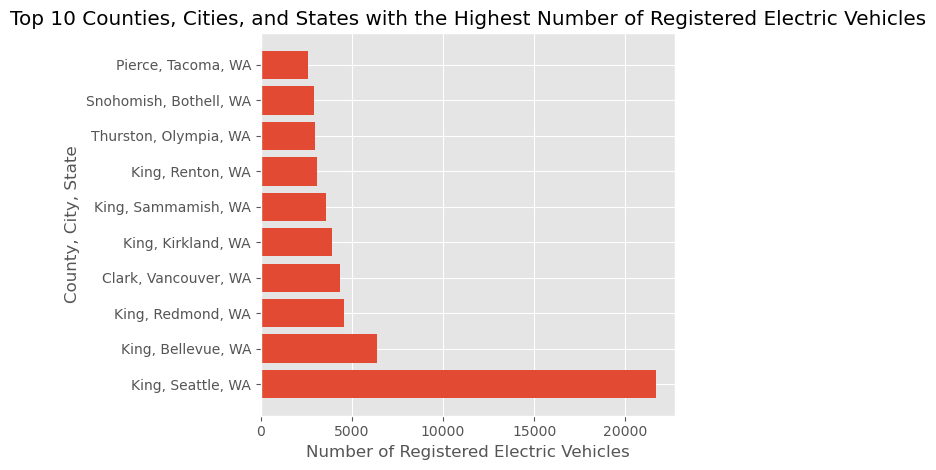

In [8]:
import matplotlib.pyplot as plt
# group the data by county, city, and state and count the number of electric vehicles in each group
grouped = df.groupby(['County', 'City', 'State']).size().reset_index(name='Count')

# sort the groups in descending order based on the count of electric vehicles
sorted_groups = grouped.sort_values('Count', ascending=False)

# take the top 10 groups with the highest number of registered electric vehicles
top_10_groups = sorted_groups.head(10)
# create a bar plot of the top 10 groups
plt.barh(y=top_10_groups['County'] + ', ' + top_10_groups['City'] + ', ' + top_10_groups['State'], width=top_10_groups['Count'])
plt.xlabel('Number of Registered Electric Vehicles')
plt.ylabel('County, City, State')
plt.title('Top 10 Counties, Cities, and States with the Highest Number of Registered Electric Vehicles')
plt.tight_layout()
plt.show()

What is the distribution of electric vehicle types in the dataset?

In [9]:
# Calculate the value counts of electric vehicle types
ev_types = df["Electric Vehicle Type"].value_counts()

# Print the results
print(ev_types)

Battery Electric Vehicle (BEV)            94118
Plug-in Hybrid Electric Vehicle (PHEV)    27860
Name: Electric Vehicle Type, dtype: int64


Which vehicle make and model is the most popular among electric vehicle owners?

In [10]:
electric_df = df[df['Electric Vehicle Type'] != 'Plug-in Hybrid Electric Vehicle']

# Count the occurrences of each make and model combination
popular_vehicle = electric_df.groupby(['Make', 'Model']).size().reset_index(name='Count')

# Sort the results in descending order by count
popular_vehicle = popular_vehicle.sort_values(by='Count', ascending=False)

# Print the most popular vehicle make and model
print('The most popular electric vehicle make and model is {} {} with {} vehicles registered.'.format(
    popular_vehicle.iloc[0]['Make'], popular_vehicle.iloc[0]['Model'], popular_vehicle.iloc[0]['Count']))

The most popular electric vehicle make and model is TESLA MODEL 3 with 24117 vehicles registered.


How has the number of electric vehicle registrations changed over time?

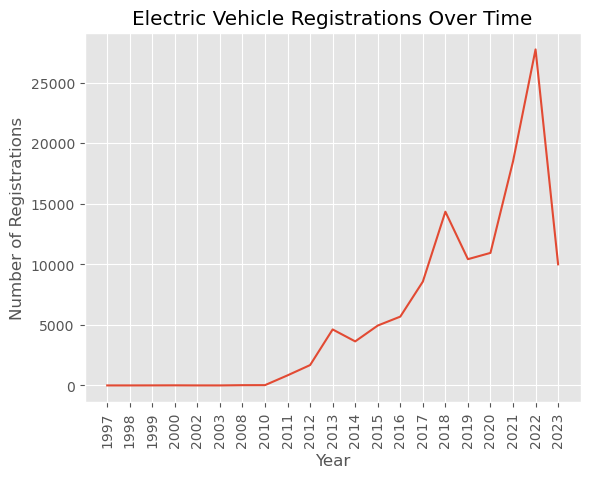

In [11]:
# Extract the year from the Model Year column
df['Year'] = df['Model Year'].astype(str).str[:4]

# Group the data by year and count the number of electric vehicles
year_counts = df[df['Electric Vehicle Type'].notna()].groupby('Year').size()

# Plot the results as a line chart
plt.plot(year_counts.index, year_counts.values)
plt.title('Electric Vehicle Registrations Over Time')
plt.xlabel('Year')
plt.xticks(rotation=90)

plt.ylabel('Number of Registrations')
plt.show()

**** What is the relationship between CAFV eligibility and the number of electric vehicle registrations in a particular area?

In [12]:
# group data by county and aggregate by sum
grouped_county = df.groupby('County')[['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']].sum()
grouped_county

,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
County,,
Adams,Battery Electric Vehicle (BEV)Plug-in Hybrid E...,Clean Alternative Fuel Vehicle EligibleNot eli...
Alameda,Battery Electric Vehicle (BEV)Battery Electric...,Clean Alternative Fuel Vehicle EligibleEligibi...
Alexandria,Plug-in Hybrid Electric Vehicle (PHEV)Plug-in ...,Not eligible due to low battery rangeClean Alt...
Allegheny,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
Allen,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
...,...,...
Whatcom,Plug-in Hybrid Electric Vehicle (PHEV)Battery ...,Not eligible due to low battery rangeEligibili...
Whitman,Plug-in Hybrid Electric Vehicle (PHEV)Plug-in ...,Clean Alternative Fuel Vehicle EligibleNot eli...
Wichita,Battery Electric Vehicle (BEV)Battery Electric...,Clean Alternative Fuel Vehicle EligibleClean A...


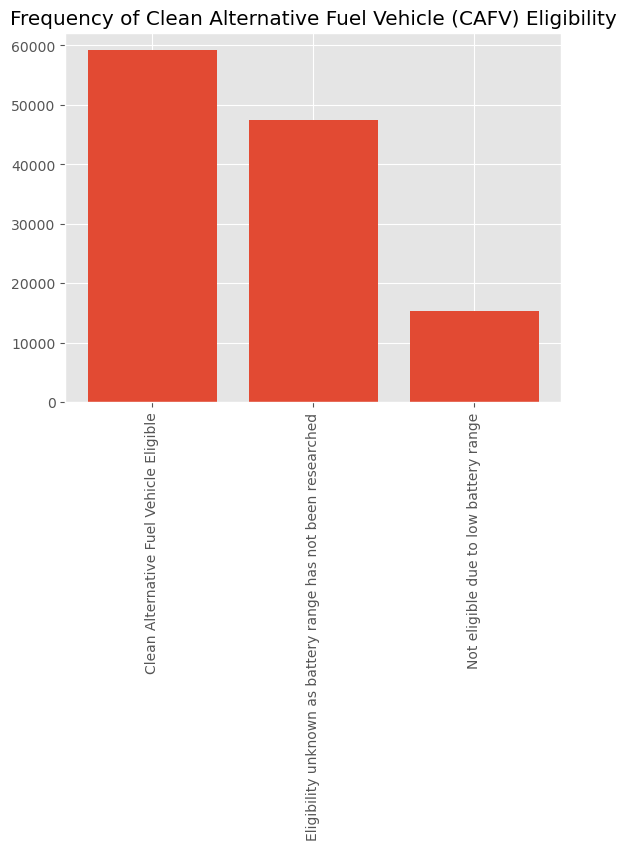

In [13]:

caf_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.bar(caf_counts.index, caf_counts.values)
plt.title('Frequency of Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.xticks(rotation=90)
plt.show()

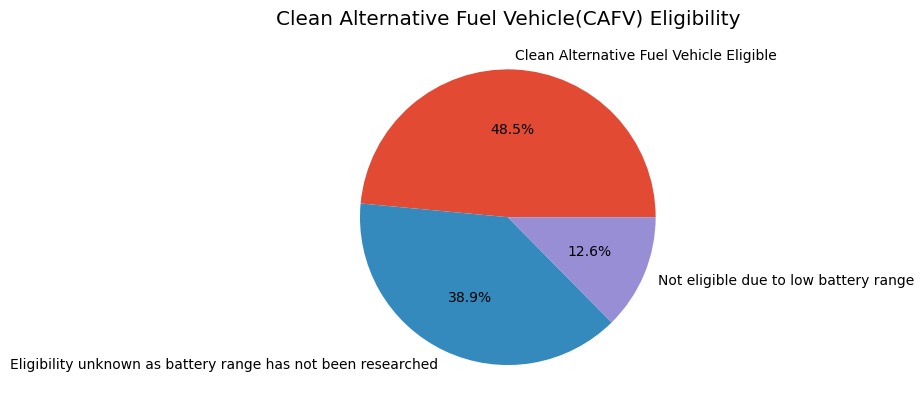

In [14]:
# count the frequency of each category for CAFV Eligibility
caf_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# create a pie chart for CAFV Eligibility
plt.pie(caf_counts.values, labels=caf_counts.index, autopct='%1.1f%%')
plt.title('Clean Alternative Fuel Vehicle(CAFV) Eligibility')

# show the plot
plt.show()

Are there any specific counties, cities, or states that have higher CAFV eligibility compared to others?

In [15]:
# Group the data by county, city, and state and count the number of CAFV eligible vehicles in each group
grouped_data = df.groupby(['County', 'City', 'State'])['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(lambda x: (x == 'Clean Alternative Fuel Vehicle Eligible').sum())

# Sort the groups in descending order based on the count of CAFV eligible vehicles
sorted_data = grouped_data.sort_values(ascending=False)

# Print the top 10 groups with the highest count of CAFV eligible vehicles
print(sorted_data.head(10))

County     City       State
King       Seattle    WA       10777
           Bellevue   WA        3032
           Redmond    WA        2163
Clark      Vancouver  WA        2117
King       Kirkland   WA        1919
           Sammamish  WA        1695
Thurston   Olympia    WA        1497
King       Renton     WA        1430
Snohomish  Bothell    WA        1252
Pierce     Tacoma     WA        1249
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64


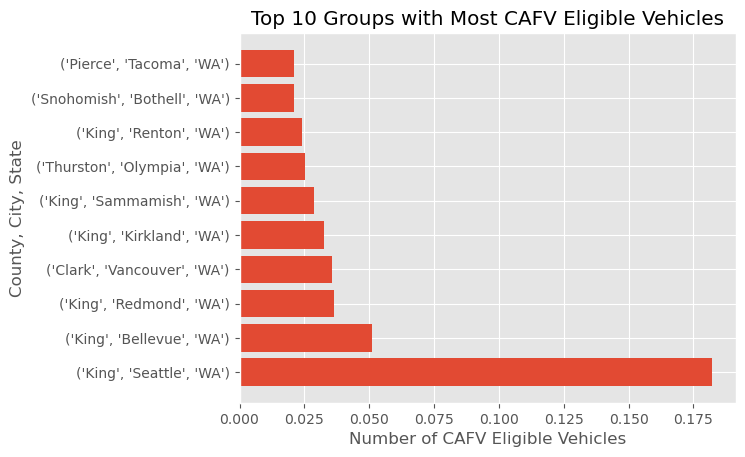

In [16]:

# group the data by county, city, and state and count the number of CAFV eligible vehicles in each group
grouped_data = df.groupby(['County', 'City', 'State'])['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(lambda x: (x == 'Clean Alternative Fuel Vehicle Eligible').sum())

# sort the groups in descending order based on the count of CAFV eligible vehicles
sorted_data = grouped_data.sort_values(ascending=False)

# normalize the data by dividing by the total count of CAFV eligible vehicles
normalized_data = sorted_data / sorted_data.sum()

# take the top 10 groups
top_10_groups = normalized_data.head(10)

# convert the index to a list of strings
group_labels = top_10_groups.index.map(lambda x: str(x)).tolist()

# create a horizontal bar plot of the top 10 groups
plt.barh(y=group_labels, width=top_10_groups)
plt.xlabel('Number of CAFV Eligible Vehicles')
plt.ylabel('County, City, State')
plt.title('Top 10 Groups with Most CAFV Eligible Vehicles')
plt.show()

Is there a correlation between the electric-only range of a vehicle and its popularity among electric vehicle owners?

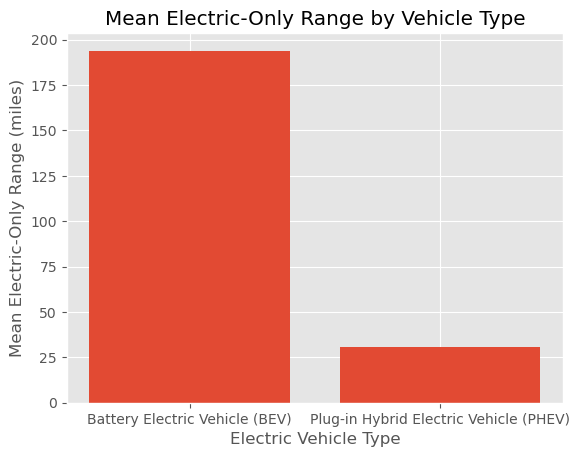

In [17]:
df = df[df['Electric Range'].notna()]
df = df[df['Electric Range'] > 0]
range_vs_type = df[['Electric Range', 'Electric Vehicle Type']]
grouped_data = range_vs_type.groupby('Electric Vehicle Type').mean()
plt.bar(x=grouped_data.index, height=grouped_data['Electric Range'])
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Mean Electric-Only Range (miles)')
plt.title('Mean Electric-Only Range by Vehicle Type')
plt.show()

What is the average age of electric vehicles in the dataset?

In [18]:
# Calculate the age of each electric vehicle
df['Model Year'] = df['Model Year'].astype(str)
df['Age'] = 2023 - df['Model Year'].str[:4].astype(int)

# Calculate the average age of electric vehicles
avg_age = df[df['Electric Vehicle Type'].str.contains('Electric')]['Age'].mean()

print(f"The average age of electric vehicles in the dataset is {avg_age:.1f} years.")

The average age of electric vehicles in the dataset is 5.3 years.


Are there any patterns in electric vehicle registrations based on postal code or geographic region?

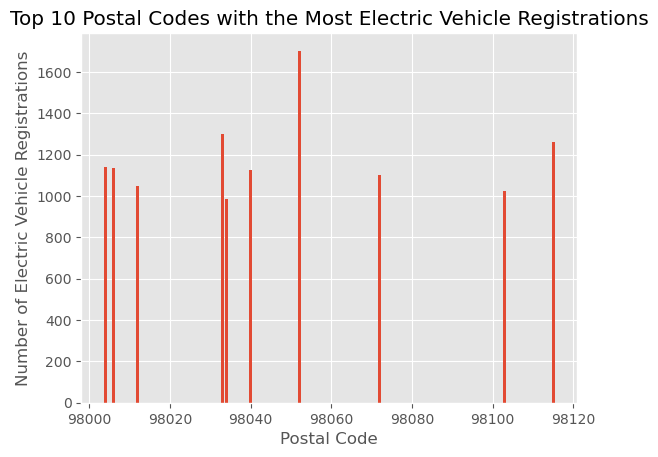

In [19]:
# group the data by postal code and count the number of electric vehicle registrations in each group
grouped_data = df.groupby('Postal Code')['Electric Vehicle Type'].count()

# sort the groups in descending order based on the count of electric vehicle registrations
sorted_data = grouped_data.sort_values(ascending=False)

# plot a bar chart of the top 10 postal codes with the most electric vehicle registrations
plt.bar(sorted_data.index[:10], sorted_data.values[:10])
plt.xlabel('Postal Code')
plt.ylabel('Number of Electric Vehicle Registrations')
plt.title('Top 10 Postal Codes with the Most Electric Vehicle Registrations')
plt.show()

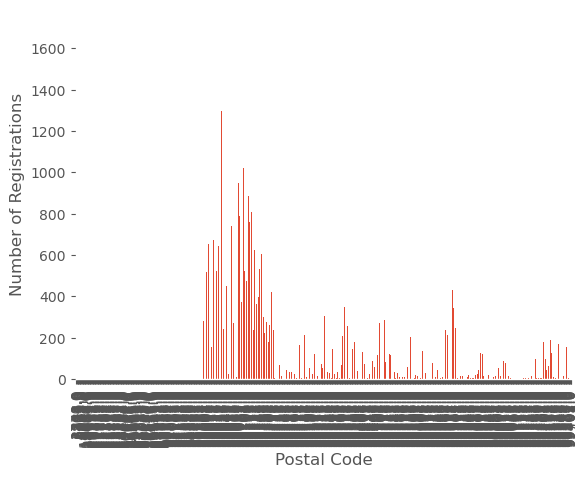

In [20]:


# group the data by postal code and count the number of registrations in each group
registrations_by_postal_code = df.groupby('Postal Code').size()

# plot the results as a bar chart
registrations_by_postal_code.plot(kind='bar')
plt.xlabel('Postal Code')
plt.ylabel('Number of Registrations')
plt.show()

how the make is distributed

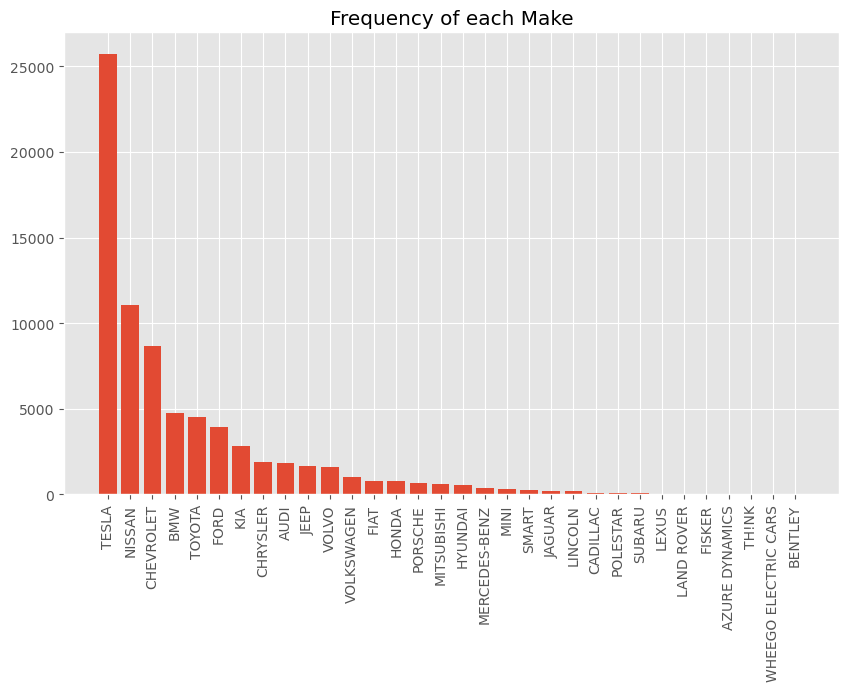

In [21]:
# count the frequency of each make
make_counts = df['Make'].value_counts()

# create a bar chart for make
fig = plt.figure(figsize=(10, 6))
plt.bar(make_counts.index, make_counts.values)
plt.title('Frequency of each Make')
plt.xticks(rotation=90)
plt.show()

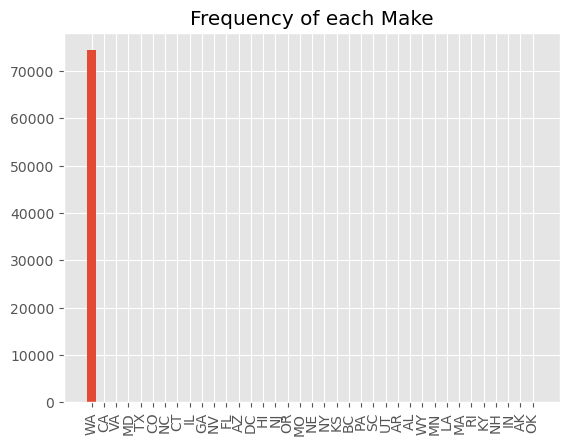

In [22]:
# count the frequency of each make
state_counts = df['State'].value_counts()

# create a bar chart for make
plt.bar(state_counts.index, state_counts.values)
plt.title('Frequency of each Make')
plt.xticks(rotation=90)
plt.show()

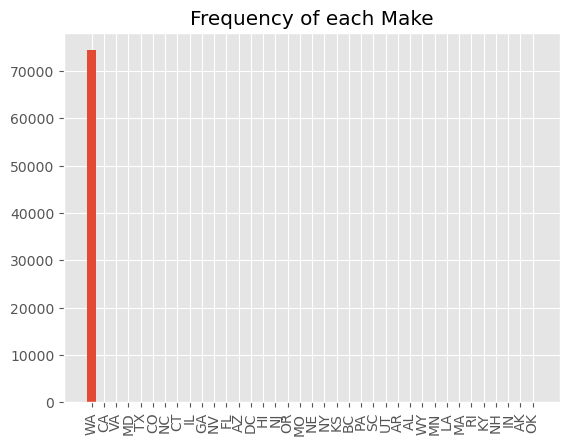

In [23]:
# count the frequency of each make
state_counts = df['State'].value_counts()

# create a bar chart for make
plt.bar(state_counts.index, state_counts.values)
plt.title('Frequency of each Make')
plt.xticks(rotation=90)
plt.show()

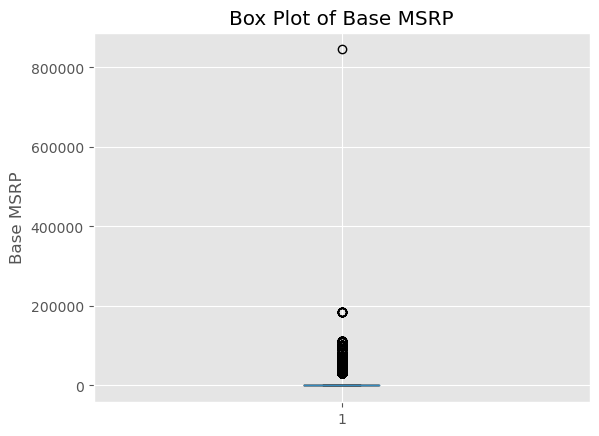

In [24]:
plt.boxplot(df['Base MSRP'])
plt.title('Box Plot of Base MSRP')
plt.ylabel('Base MSRP')
plt.show()

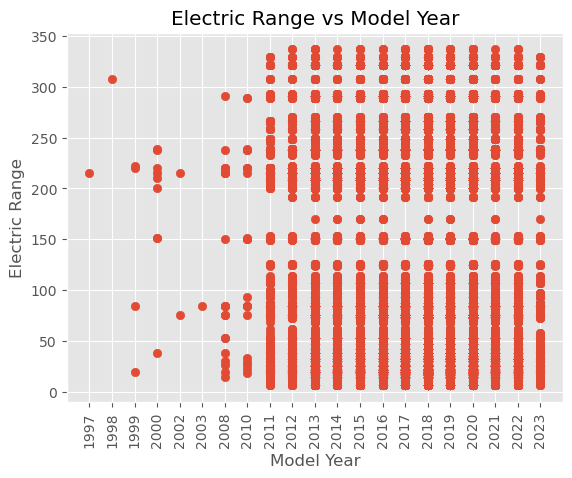

In [25]:
plt.scatter(df['Model Year'].sort_values(), df['Electric Range'])
plt.title('Electric Range vs Model Year')
plt.xlabel('Model Year')
plt.xticks(rotation=90)
plt.ylabel('Electric Range')
plt.show()

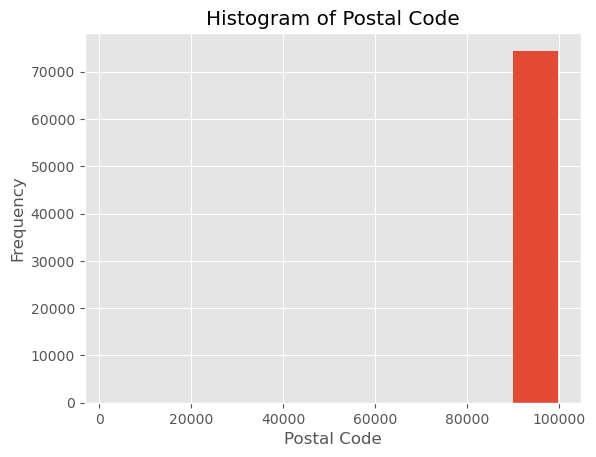

In [26]:
plt.hist(df['Postal Code'])
plt.title('Histogram of Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Frequency')
plt.show()

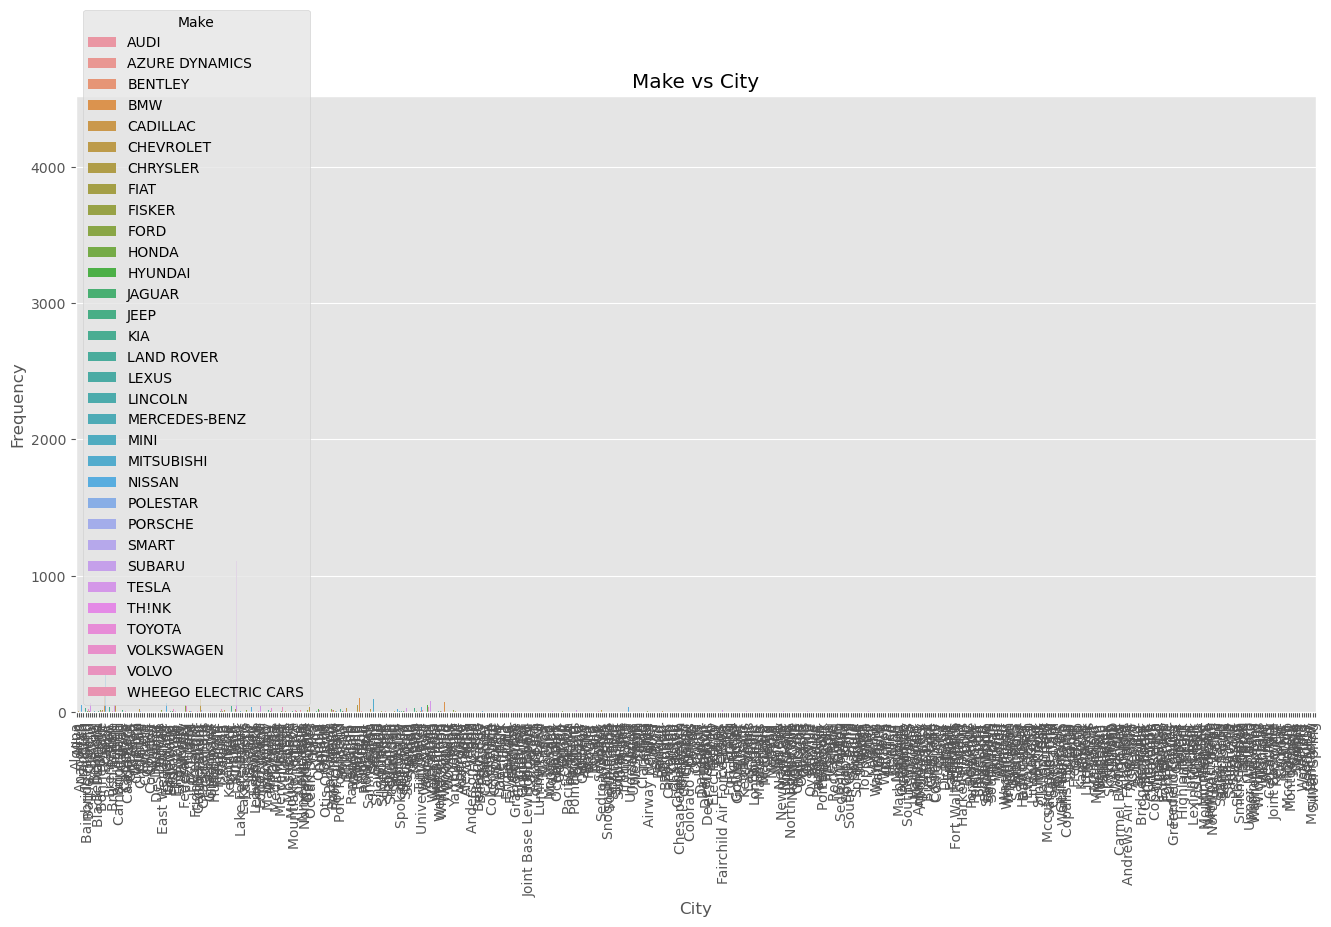

In [27]:
import seaborn as sns
grouped_data = df.groupby(['Make', 'City']).size().reset_index(name='Frequency')
plt.figure(figsize=(16, 8))
sns.barplot(x='City', y='Frequency', hue='Make', data=grouped_data)
plt.xticks(rotation=90)
plt.title('Make vs City')
plt.show()

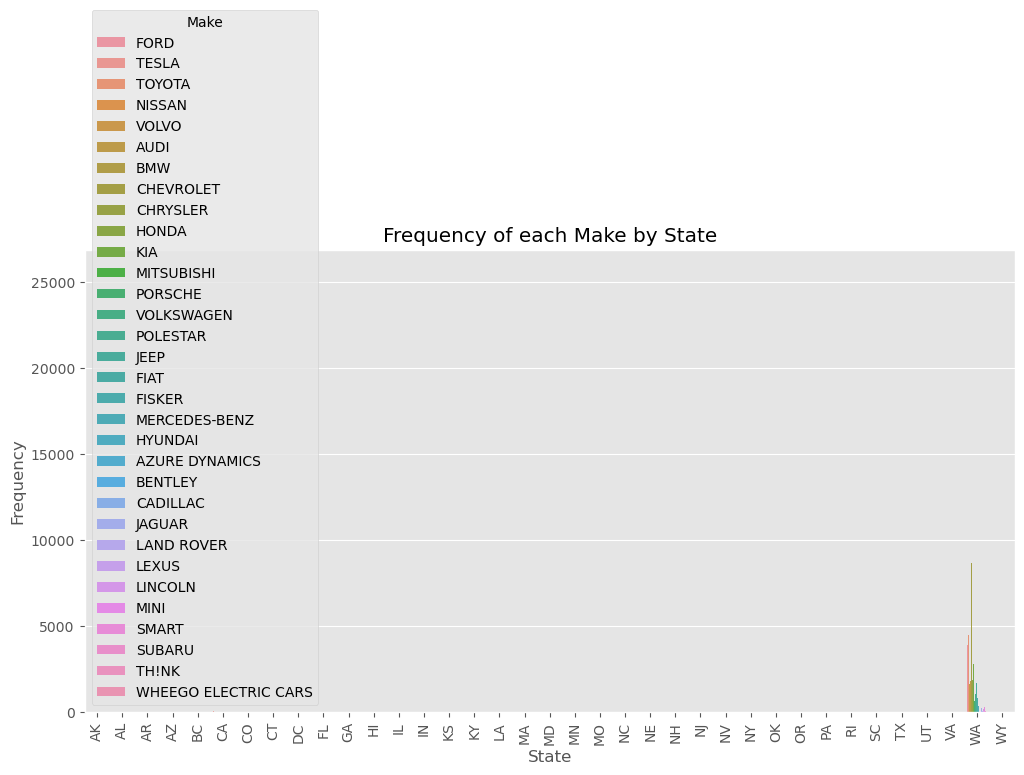

In [28]:
state_make_counts = df.groupby(['State', 'Make']).size().reset_index(name='Frequency')
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Frequency', hue='Make', data=state_make_counts)
plt.title('Frequency of each Make by State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

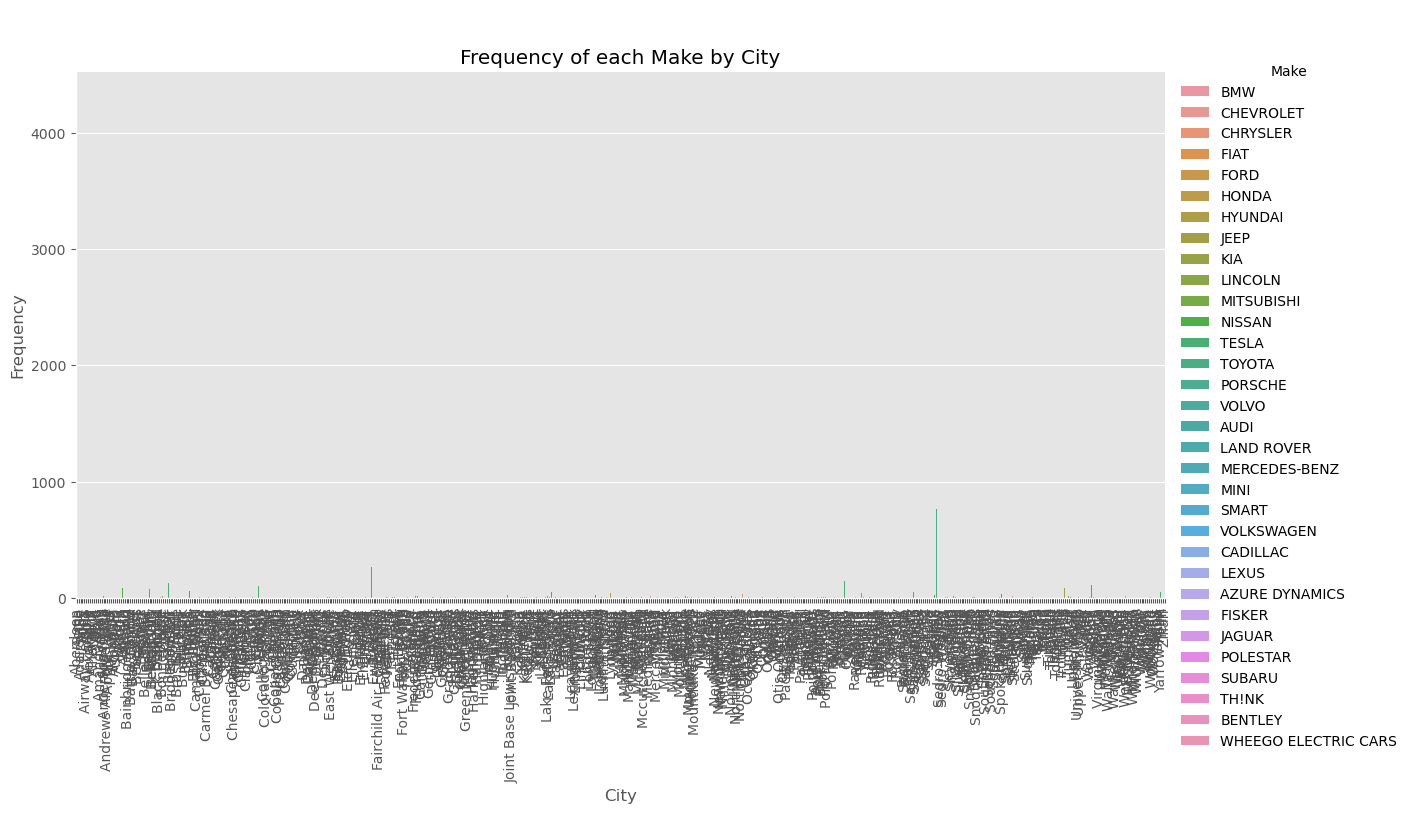

In [29]:
city_make_counts = df.groupby(['City', 'Make']).size().reset_index(name='Frequency')

plt.figure(figsize=(12, 6))
sns.catplot(x='City', y='Frequency', hue='Make', data=city_make_counts, kind='bar', height=6, aspect=2)
plt.title('Frequency of each Make by City')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

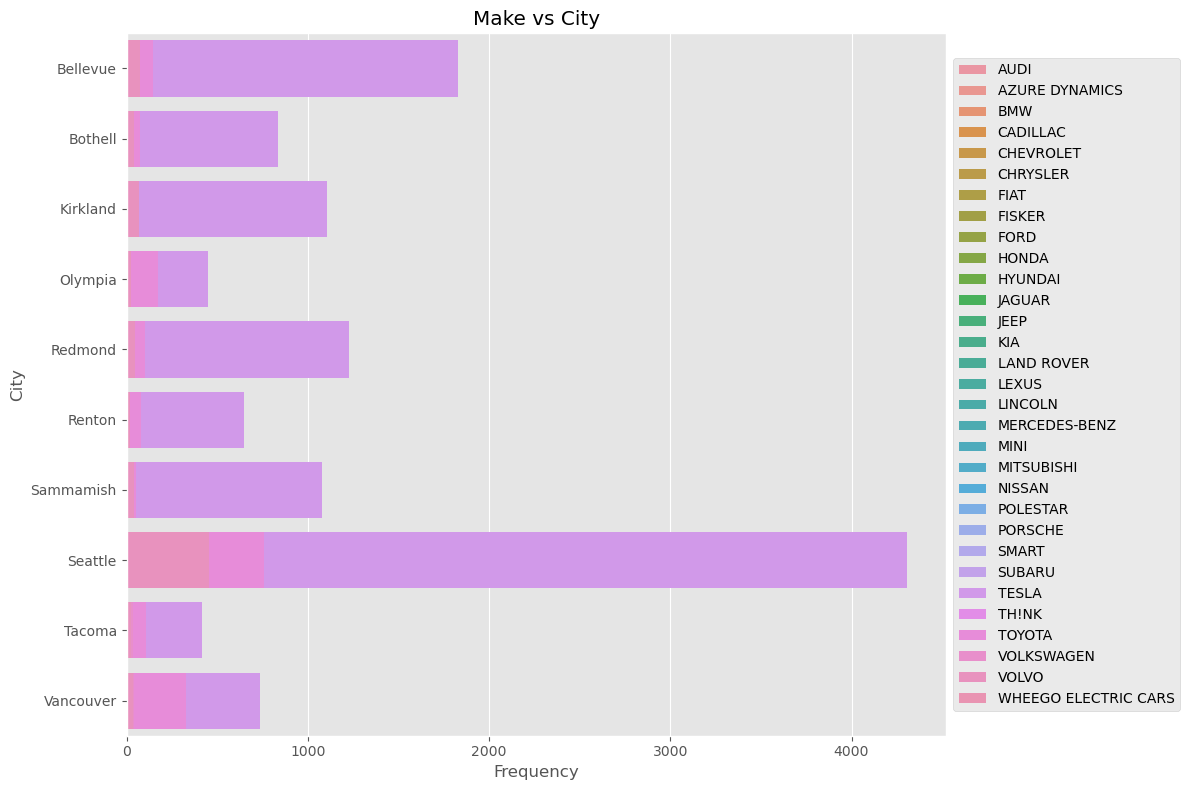

In [30]:

# Group the data by make and city and count the frequency
grouped_data = df.groupby(['Make', 'City']).size().reset_index(name='Frequency')

# Group the data by city and sum the frequency, sort in descending order, and select top 10 rows
top_cities = grouped_data.groupby('City').sum().sort_values('Frequency', ascending=False).head(10).index

# Filter the data to keep only the top 10 cities
grouped_data = grouped_data[grouped_data['City'].isin(top_cities)]

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='City', hue='Make', data=grouped_data, dodge=False)
plt.title('Make vs City')
plt.xlabel('Frequency')
plt.ylabel('City')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

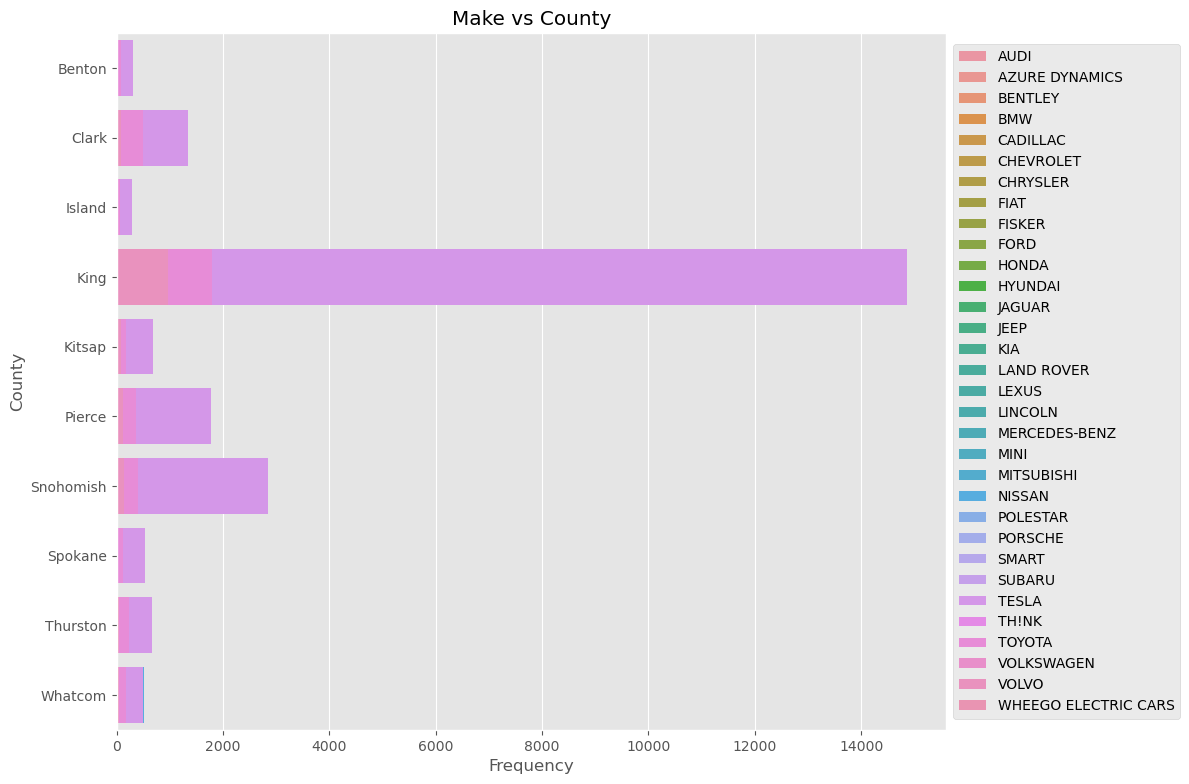

In [31]:

# Group the data by make and city and count the frequency
grouped_data = df.groupby(['Make', 'County']).size().reset_index(name='Frequency')

# Group the data by city and sum the frequency, sort in descending order, and select top 10 rows
top_cities = grouped_data.groupby('County').sum().sort_values('Frequency', ascending=False).head(10).index

# Filter the data to keep only the top 10 cities
grouped_data = grouped_data[grouped_data['County'].isin(top_cities)]

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='County', hue='Make', data=grouped_data, dodge=False)
plt.title('Make vs County')
plt.xlabel('Frequency')
plt.ylabel('County')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

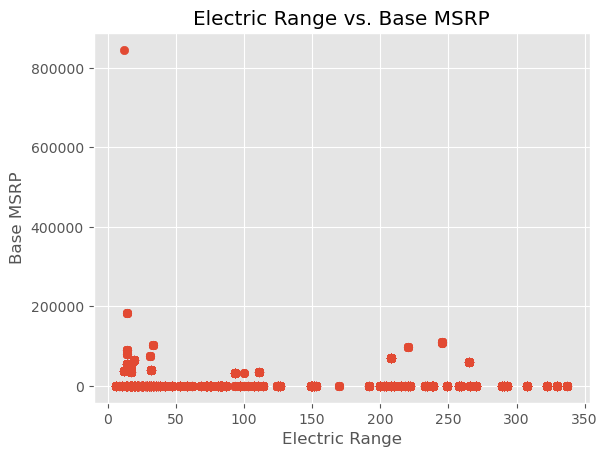

In [32]:
# Extract x and y variables
x = df['Electric Range']
y = df['Base MSRP']

# Create scatter plot
plt.scatter(x, y)
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.title('Electric Range vs. Base MSRP')
plt.show()

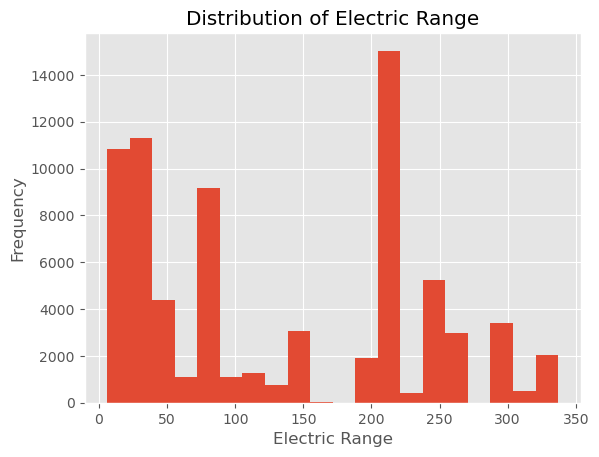

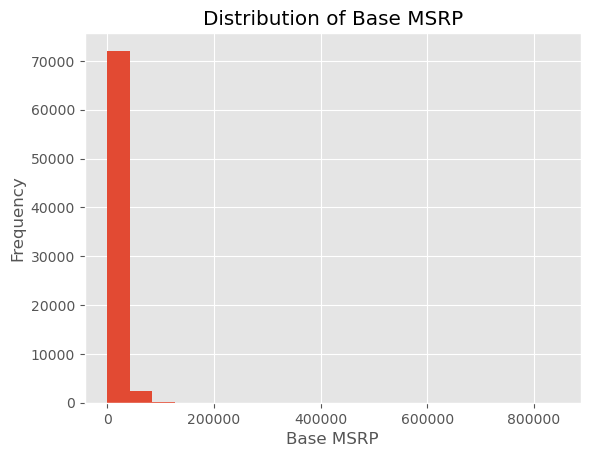

In [33]:
# create a histogram of electric range
plt.hist(df['Electric Range'], bins=20)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

# create a histogram of base MSRP
plt.hist(df['Base MSRP'], bins=20)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.show()

In [34]:
# group the data by Electric Range and Make columns
df_grouped = df.groupby(['Electric Range', 'Make'])

# get the count of rows in each group
df_counts = df_grouped.size().reset_index(name='Count')

# display the resulting DataFrame
print(df_counts)

     Electric Range           Make  Count
0                 6         TOYOTA    929
1                 8  MERCEDES-BENZ     42
2                 9  MERCEDES-BENZ     20
3                10  MERCEDES-BENZ    159
4                11  MERCEDES-BENZ      3
..              ...            ...    ...
152             293          TESLA    420
153             308          TESLA    502
154             322          TESLA   1669
155             330          TESLA    313
156             337          TESLA     72

[157 rows x 3 columns]


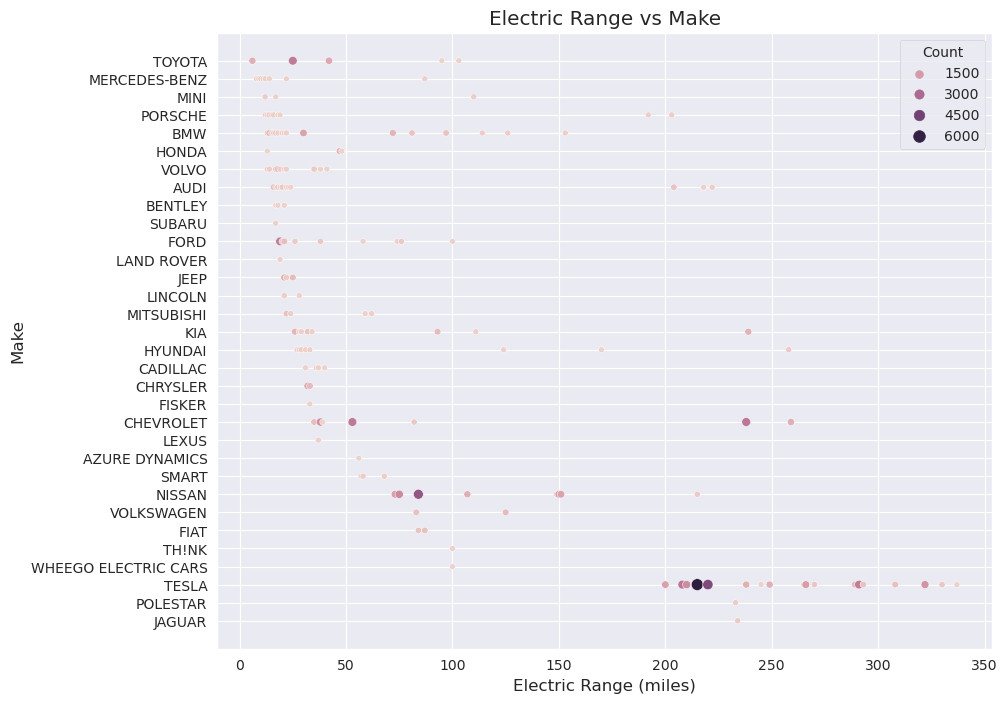

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the plot
sns.set_style('darkgrid')

# create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Electric Range', y='Make', size='Count', hue='Count', data=df_counts)
plt.title('Electric Range vs Make')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Make')
plt.show()

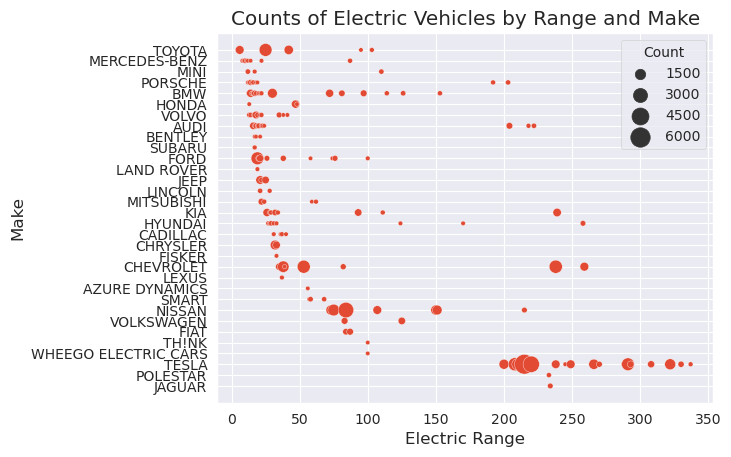

In [36]:
import seaborn as sns

# create scatter plot with count as the size of points
sns.scatterplot(data=df_counts, x='Electric Range', y='Make', size='Count', sizes=(10, 200))
plt.title('Counts of Electric Vehicles by Range and Make')
plt.xlabel('Electric Range')
plt.ylabel('Make')
plt.show()

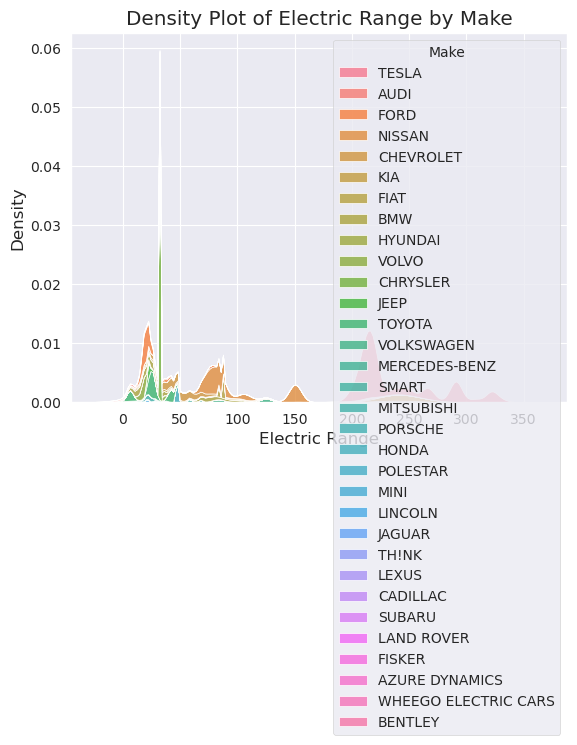

In [37]:
import seaborn as sns

# create a density plot for each make
sns.kdeplot(data=df, x='Electric Range', hue='Make', multiple='stack', warn_singular=False)

# set the title and axis labels
plt.title('Density Plot of Electric Range by Make')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Electric Range')
plt.ylabel('Density')

# show the plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# create a density plot for each make
sns.kdeplot(data=df, x='Electric Range', hue='Make', multiple='fill',warn_singular=False)

# set the title and axis labels
plt.title('Density Plot of Electric Range by Make')
plt.xlabel('Electric Range')
plt.ylabel('Density')

# set the x-axis range
plt.xlim(0,150)
plt.ylim(0, 0.5)

# show the legend and the plot
plt.legend(
    #bbox_to_anchor=(1.05, 1), loc='upper left'
)
plt.show()

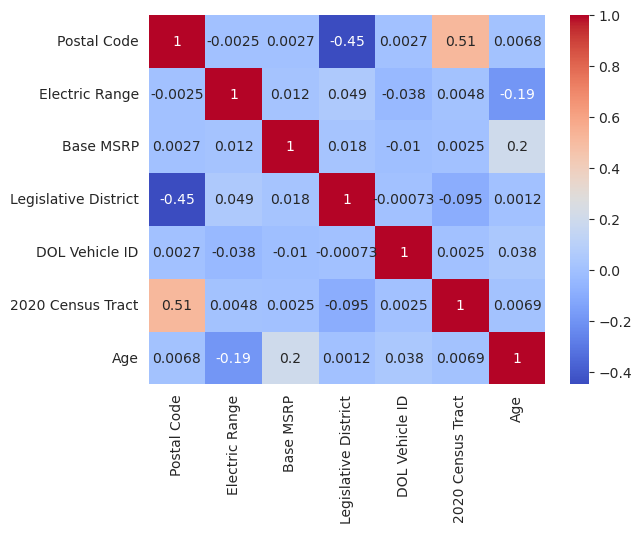

In [38]:
# create a correlation matrix
corr_matrix = df.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

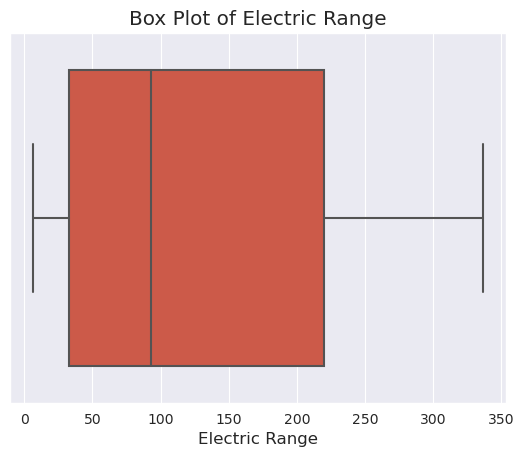

In [39]:


# create a box plot of the Electric Range variable
sns.boxplot(x='Electric Range', data=df)

# set the title and axis labels
plt.title('Box Plot of Electric Range')
plt.xlabel('Electric Range')

# show the plot
plt.show()

In [40]:

#plt.figure(figsize=(10,12))
#sns.scatterplot(x='Electric Utility', y='Electric Range', data=df)
#plt.xlabel('Electric Range')
#plt.xticks(rotation=90)
#plt.ylabel('Electric Utility')
#plt.title('Electric Range vs. Electric Utility')
#plt.show()

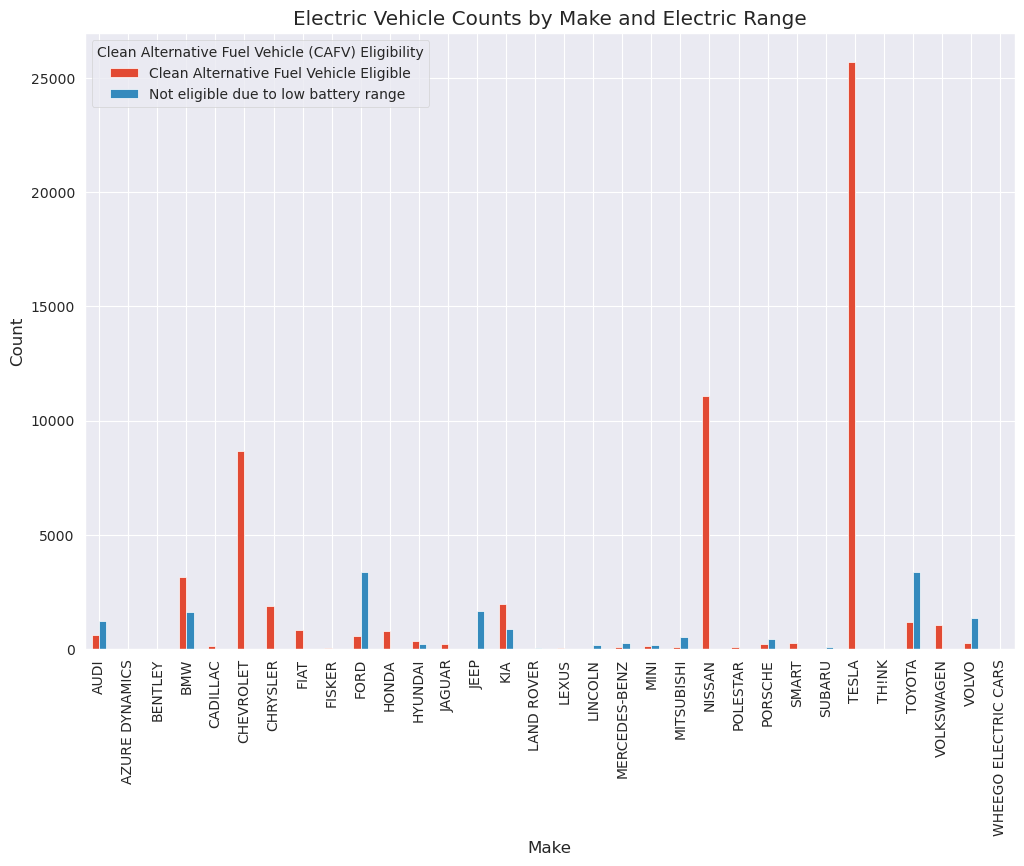

In [41]:
# group by Make and Electric Range and aggregate the counts
df_grouped = df.groupby(['Make', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']).agg({'Electric Vehicle Type': 'count'}).reset_index()

# create a pivot table to reshape the data for plotting
df_pivot = df_grouped.pivot(index='Make', columns='Clean Alternative Fuel Vehicle (CAFV) Eligibility', values='Electric Vehicle Type')

# create the grouped bar chart
ax = df_pivot.plot(kind='bar', figsize=(12,8))
ax.set_xlabel('Make')
ax.set
ax.set_ylabel('Count')
ax.set_title('Electric Vehicle Counts by Make and Electric Range')
plt.show()

import pandas as pd
from scipy import stats


# filter the data to include only CAFV and non-CAFV vehicles
cafvs = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligible for CA HOV Incentive']
non_cafvs = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Eligible for CA HOV Incentive']

# perform two-sample t-test
t_stat, p_val = stats.ttest_ind(cafvs['Electric Range'], non_cafvs['Electric Range'], equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)

import pandas as pd
from scipy import stats

# perform ANOVA test
anova = stats.f_oneway(*[group['Electric Range'] for name, group in df.groupby('Make')])

print("F-statistic:", anova.statistic)
print("p-value:", anova.pvalue)

This indicates that there is a significant difference in the mean electric range of vehicles from different manufacturers, as the F-statistic is large and the p-value is very small (less than 0.05).

In [42]:
import pandas as pd
from scipy import stats

# create a contingency table of Electric Vehicle Type vs. County
contingency_table = pd.crosstab(df['Electric Vehicle Type'], df['County'])

# perform chi-squared test
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_val)

Chi-square statistic: 1219.4936578932288
p-value: 5.77244247631794e-173


The chi-square statistic and its associated p-value are a measure of the degree of association between the two categorical variables "County" and "Electric Vehicle Type".

The chi-square statistic in this case is 1219.49, which is a large value, indicating that there is a significant difference between the observed and expected frequencies of electric vehicle types in different counties.

The p-value associated with this statistic is 5.77e-173, which is much smaller than the typical significance level of 0.05, indicating strong evidence against the null hypothesis of independence between the two variables. Therefore, we can conclude that there is a significant association between the county and the type of electric vehicle, and the proportion of all-electric vehicles is significantly different in different counties.

In [43]:
# making it easy to identify which features have the most missing data.
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Electric Utility                                     0.437226
Legislative District                                 0.268237
Vehicle Location                                     0.028165
City                                                 0.002682
Postal Code                                          0.002682
2020 Census Tract                                    0.002682
County                                               0.002682
VIN (1-10)                                           0.000000
Base MSRP                                            0.000000
Year                                                 0.000000
DOL Vehicle ID                                       0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Electric Vehicle Type                                0.000000
Model                                                0.000000
Make                                                 0.000000
Model Ye

In [44]:
df['Electric Utility'] = df['Electric Utility'].fillna('Utility Not Avalilable')
df['Legislative District'] = df['Legislative District'].fillna('Unknown')
df['Vehicle Location'] = df['Vehicle Location'].fillna('Unknown')
df['2020 Census Tract'] = df['2020 Census Tract'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')
# fill null values in the 'Postal Code' column with the mean salary
mean_postcode = df['Postal Code'].mean()
df['Postal Code'] = df['Postal Code'].fillna(mean_postcode)
df['County'] = df['County'].fillna('Unknown')

In [45]:
# making it easy to identify which features have the most missing data.
missing_percentage1 = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage1

VIN (1-10)                                           0.0
Electric Range                                       0.0
Year                                                 0.0
2020 Census Tract                                    0.0
Electric Utility                                     0.0
Vehicle Location                                     0.0
DOL Vehicle ID                                       0.0
Legislative District                                 0.0
Base MSRP                                            0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
County                                               0.0
Electric Vehicle Type                                0.0
Model                                                0.0
Make                                                 0.0
Model Year                                           0.0
Postal Code                                          0.0
State                                                0.0
City                           

In [46]:
# convert the 'Postal Code ' attribute from float to integer
df['Postal Code'] = df['Postal Code'].astype(int)
display(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74561 entries, 0 to 121976
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   VIN (1-10)                                         74561 non-null  object
 1   County                                             74561 non-null  object
 2   City                                               74561 non-null  object
 3   State                                              74561 non-null  object
 4   Postal Code                                        74561 non-null  int64 
 5   Model Year                                         74561 non-null  object
 6   Make                                               74561 non-null  object
 7   Model                                              74561 non-null  object
 8   Electric Vehicle Type                              74561 non-null  object
 9   Clean Alternativ

None

In [47]:
df = df.rename(columns={'Postal Code': 'PostalCode', 'Model Year': 'ModelYear','Electric Vehicle Type': 'Electric_Vehicle_Type',
'Clean Alternative Fuel Vehicle (CAFV) Eligibility':'CAFV_Eligibility','Electric Range':'Electric_Range', 'Base MSRP':'Base_MSRP', 'Legislative District':'Legislative_District',
'DOL Vehicle ID': 'DOL_Vehicle_ID','Vehicle Location':'Vehicle_Location','Electric Utility':'Electric_Utility','2020 Census Tract':'2020_Census_Tract','VIN (1-10)':'VIN'})
print(df.columns)
display(df.info())

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract', 'Year',
       'Age'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 74561 entries, 0 to 121976
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   VIN                    74561 non-null  object
 1   County                 74561 non-null  object
 2   City                   74561 non-null  object
 3   State                  74561 non-null  object
 4   PostalCode             74561 non-null  int64 
 5   ModelYear              74561 non-null  object
 6   Make                   74561 non-null  object
 7   Model                  74561 non-null  object
 8   Electric_Vehicle_Type  74561 non-null  object

None

In [48]:
df.columns.unique()

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract', 'Year',
       'Age'],
      dtype='object')

In [49]:
df['Base_MSRP'].unique()

array([     0,  45600,  31950,  39995,  33950,  69900,  52900, 110950,
        54950,  36900,  59900,  55700,  64950,  32250, 184400,  36800,
        34995,  53400,  52650,  98950,  44100,  81100,  90700,  75095,
        43700,  89100, 102000,  91250, 109000,  32995, 845000])

In [50]:
def categorize_electric_utility(value):
    if value == "Utility Not Avalilable":
        return "Not Available"
    elif "||" in value:
        return "Multi type Utilities"
    elif "|" in value:
        return "Single Type Utilities"
    else:
        return "Only One Option"

df['Electric_Utility_Category'] = df['Electric_Utility'].apply(categorize_electric_utility)

In [51]:
df['Electric_Utility_Category'].unique()

array(['Not Available', 'Only One Option', 'Single Type Utilities',
       'Multi type Utilities'], dtype=object)

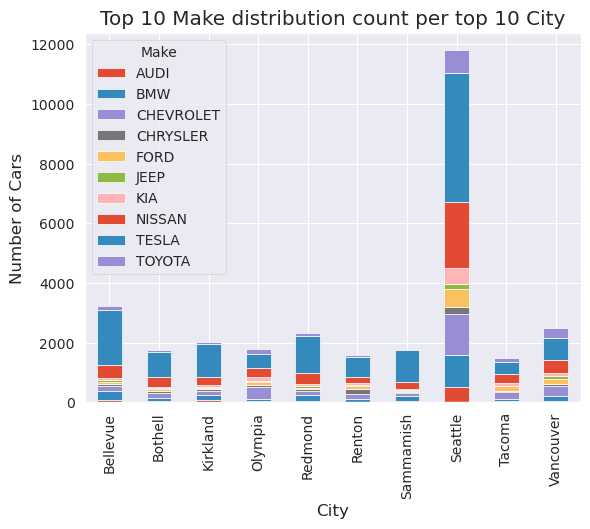

Make,AUDI,BMW,CHEVROLET,CHRYSLER,FORD,JEEP,KIA,NISSAN,TESLA,TOYOTA
City,,,,,,,,,,
Bellevue,83,298,182,49,79,49,90,436,1830,144
Bothell,39,121,149,61,72,31,62,319,833,74
Kirkland,79,176,141,42,60,29,70,264,1106,70
Olympia,41,71,411,50,122,41,117,312,450,173
Redmond,52,183,156,51,55,43,72,375,1229,101


In [52]:
cnt_MkCity = df.groupby(['City', 'Make']).size().reset_index(name='Count')
# Group the data by county and make, and sum the counts for each group
grouped_data_cty = cnt_MkCity.groupby(['City', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
city_counts = grouped_data_cty.groupby('City')['Count'].sum().reset_index()
make_counts = grouped_data_cty.groupby('Make')['Count'].sum().reset_index()

# Sort the counties by count in descending order, and select the top 10
top_cities = city_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)

# Filter the data to only include the top 10 counties
filtered_data_Cty = grouped_data_cty[grouped_data_cty['City'].isin(top_cities['City']) & 
                                     grouped_data_cty['Make'].isin(top_makes['Make'])]

# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_cty = filtered_data_Cty.pivot(index='City', columns='Make',values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_cty.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 City')
plt.xlabel('City')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()
pivoted_data_cty.head()

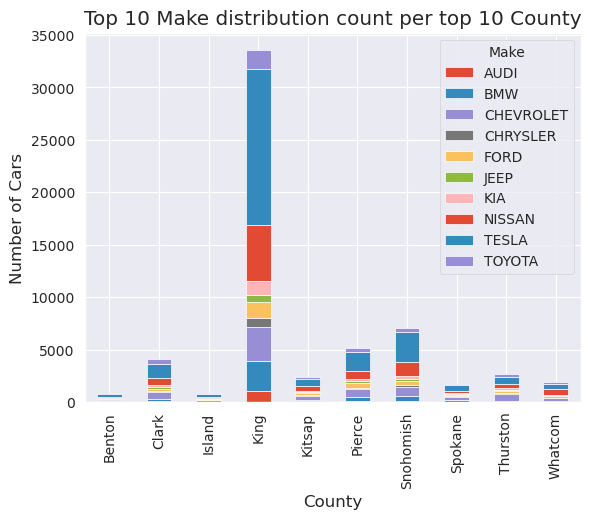

Make,AUDI,BMW,CHEVROLET,CHRYSLER,FORD,JEEP,KIA,NISSAN,TESLA,TOYOTA
County,,,,,,,,,,
Benton,14,59,171,36,91,27,21,102,308,84
Clark,86,262,579,107,266,165,154,674,1331,484
Island,23,36,164,16,69,23,50,120,281,68
King,1099,2802,3252,893,1469,698,1300,5368,14856,1794
Kitsap,70,177,380,77,164,75,130,497,685,174


In [53]:
cnt_MkCounty = df.groupby(['County', 'Make']).size().reset_index(name='Count')
# Group the data by county and make, and sum the counts for each group
grouped_data = cnt_MkCounty.groupby(['County', 'Make'])['Count'].sum().reset_index()
# Group the data by county and sum the counts for each county
county_counts = grouped_data.groupby('County')['Count'].sum().reset_index()
make_counts = grouped_data.groupby('Make')['Count'].sum().reset_index()
# Sort the counties by count in descending order, and select the top 10
top_counties = county_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)
# Filter the data to only include the top 10 counties
filtered_data = grouped_data[grouped_data['County'].isin(top_counties['County']) & grouped_data['Make'].isin(top_makes['Make'])]
# Pivot the data to create a matrix with counties as rows, makes as columns,and counts as values
pivoted_data = filtered_data.pivot(index='County', columns='Make',values='Count').fillna(0)
# Create a stacked bar plot of the pivoted data
pivoted_data.plot(kind='bar', stacked=True)
# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 County')
plt.xlabel('County')
plt.ylabel('Number of Cars')
# Show the plot
plt.show()
pivoted_data.head()

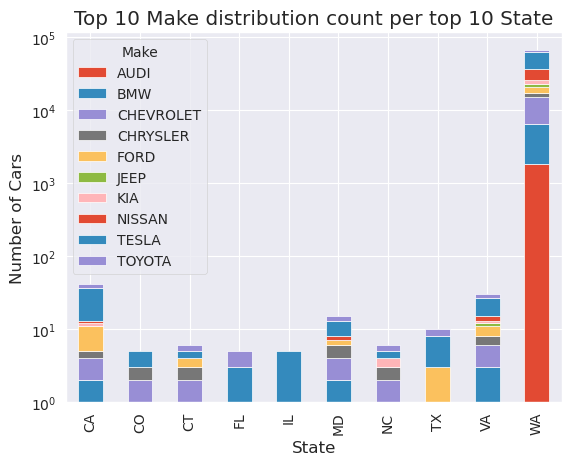

Make,AUDI,BMW,CHEVROLET,CHRYSLER,FORD,JEEP,KIA,NISSAN,TESLA,TOYOTA
State,,,,,,,,,,
CA,1.0,1.0,2.0,1.0,6.0,0.0,1.0,1.0,23.0,5.0
CO,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
CT,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
FL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
IL,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0
MD,1.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,5.0,2.0
NC,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
TX,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,2.0
VA,0.0,3.0,3.0,2.0,3.0,1.0,1.0,2.0,12.0,3.0


In [54]:
cnt_Mk_St = df.groupby(['State', 'Make']).size().reset_index(name='Count')
# Group the data by county and make, and sum the counts for each group
grouped_data_St = cnt_Mk_St.groupby(['State', 'Make'])['Count'].sum().reset_index()
# Group the data by county and sum the counts for each county
st_counts = grouped_data_St.groupby('State')['Count'].sum().reset_index()
make_counts = grouped_data_St.groupby('Make')['Count'].sum().reset_index()
# Sort the counties by count in descending order, and select the top 10
top_States = st_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)
# Filter the data to only include the top 10 counties
filtered_data_St = grouped_data_St[grouped_data_St['State'].isin(top_States['State']) & grouped_data_St['Make'].isin(top_makes['Make'])]
# Pivot the data to create a matrix with counties as rows, makes as columns,and counts as values
pivoted_data_St = filtered_data_St.pivot(index='State', columns='Make',values='Count').fillna(0)
# Create a stacked bar plot of the pivoted data
pivoted_data_St.plot(kind='bar', stacked=True)
# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 State')
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars')
# Show the plot
plt.show()
pivoted_data_St.head(10)

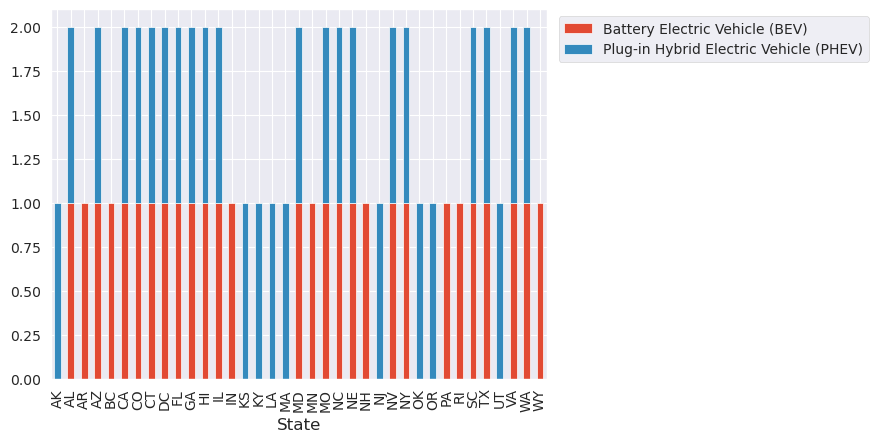

,State,Electric_Vehicle_Type,Count
7,CA,Battery Electric Vehicle (BEV),26
8,CA,Plug-in Hybrid Electric Vehicle (PHEV),23
9,CO,Battery Electric Vehicle (BEV),4
3,AR,Battery Electric Vehicle (BEV),2
4,AZ,Battery Electric Vehicle (BEV),2
5,AZ,Plug-in Hybrid Electric Vehicle (PHEV),2
6,BC,Battery Electric Vehicle (BEV),2
0,AK,Plug-in Hybrid Electric Vehicle (PHEV),1
1,AL,Battery Electric Vehicle (BEV),1
2,AL,Plug-in Hybrid Electric Vehicle (PHEV),1


In [55]:
## EVT Distribution count per state
evt_Dis_cnt = df.groupby(['State', 'Electric_Vehicle_Type']).size().reset_index(name='Count')
evt_Dis_cnt.groupby(['State', 'Electric_Vehicle_Type'])['Count'].count().unstack().plot(kind='bar', stacked=True)
# Move legend outside of plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()
evt_Dis_cnt.head(10).sort_values(by='Count', ascending=False)

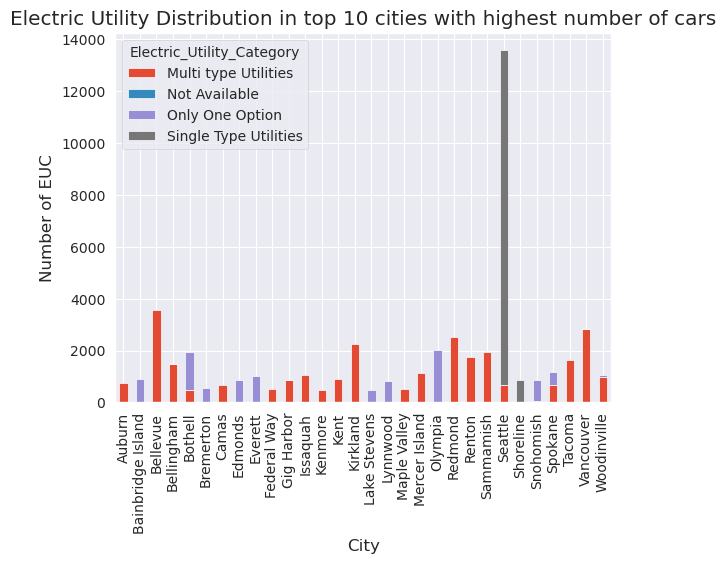

Electric_Utility_Category,Multi type Utilities,Not Available,Only One Option,Single Type Utilities
City,,,,
Auburn,744.0,0.0,0.0,0.0
Bainbridge Island,0.0,10.0,875.0,0.0
Bellevue,3569.0,0.0,0.0,0.0
Bellingham,1469.0,0.0,3.0,0.0
Bothell,468.0,0.0,1464.0,0.0
Bremerton,0.0,0.0,557.0,0.0
Camas,662.0,0.0,0.0,0.0
Edmonds,0.0,2.0,856.0,0.0
Everett,2.0,0.0,1009.0,0.0


In [56]:
cnt_Cty_EUD = df.groupby(['City', 'Electric_Utility_Category']).size().reset_index(name='Count')
# Group the data by county and make, and sum the counts for each group
grouped_data_Cty_EUD = cnt_Cty_EUD.groupby(['City','Electric_Utility_Category'])['Count'].sum().reset_index()
# Group the data by county and sum the counts for each county
Cty_EUD_counts = grouped_data_Cty_EUD.groupby('City')['Count'].sum().reset_index()
# make_counts = grouped_data_St.groupby('Make')['Count'].sum().reset_index()
# Sort the counties by count in descending order, and select the top 10
top_Cty_EUD_counts = Cty_EUD_counts.sort_values(by='Count', ascending=False).head(30)
# top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)
# Filter the data to only include the top 10 counties
filtered_data_Cty_EUD = grouped_data_Cty_EUD[grouped_data_Cty_EUD['City'].isin(top_Cty_EUD_counts['City'])]
# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_Cty_EUD = filtered_data_Cty_EUD.pivot(index='City',columns='Electric_Utility_Category', values='Count').fillna(0)
# Create a stacked bar plot of the pivoted data
pivoted_data_Cty_EUD.plot(kind='bar', stacked=True)
# Set the title and axis labels
plt.title('Electric Utility Distribution in top 10 cities with highest number of cars')
# plt.yscale('log')
plt.xlabel('City')
plt.ylabel('Number of EUC')
# Show the plot
plt.show()
pivoted_data_Cty_EUD.head(10)

Text(0.5, 1.0, 'Bottom 5 Cars')

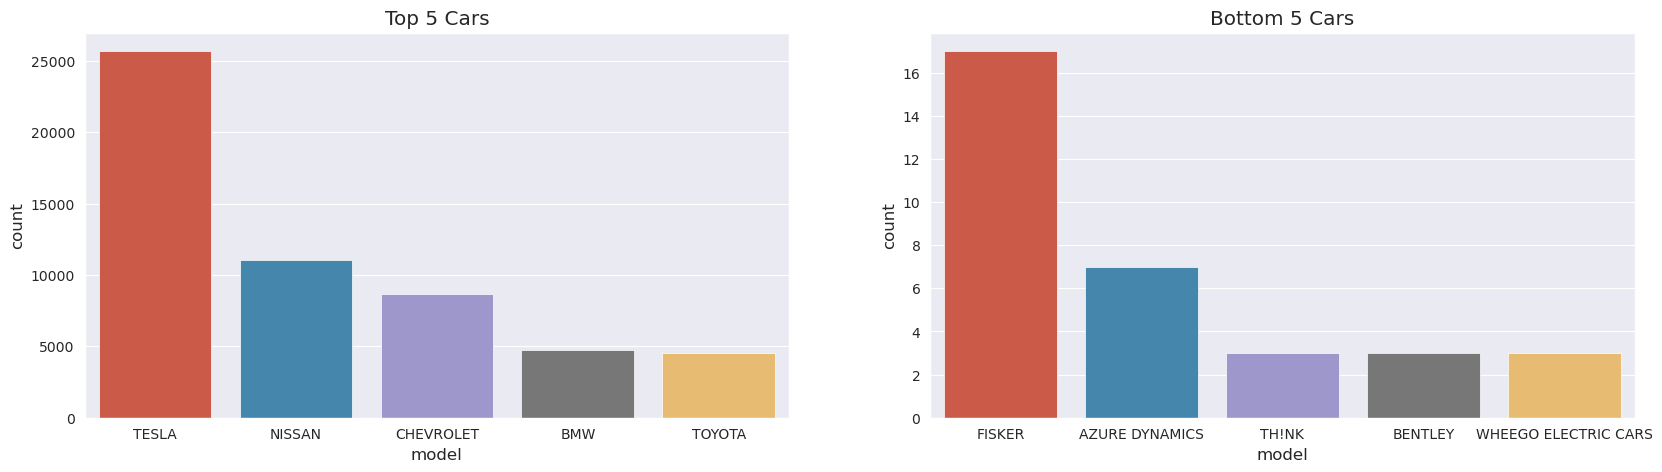

In [57]:
car_market_share = pd.DataFrame(df.groupby('Make')['VIN'].count().reset_index()).sort_values(by='VIN',ascending=False).reset_index(drop=True)
car_market_share.columns = ['model','count']
car_market_share_top_5 = car_market_share.head(5)
car_market_share_bottom_5 = car_market_share.tail(5)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(data=car_market_share_top_5, x="model", y="count",ax=axes[0])
sns.barplot(data=car_market_share_bottom_5, x="model", y="count",ax=axes[1])
axes[0].set_title('Top 5 Cars')
axes[1].set_title('Bottom 5 Cars')

In [58]:
import plotly.express as ps
km_range = pd.DataFrame(df.groupby('Make')['Electric_Range'].mean().reset_index()).sort_values(by='Electric_Range',ascending=False).reset_index(drop=True).head(10)
km_range.columns = ['model','km_range']
ps.pie(data_frame=km_range, names='model', values='km_range',hover_name='km_range',title='Top 10 Model with KM range',hole=True)

In [59]:
# Year Wise Cars
year_wise_cars = df.groupby('ModelYear')['VIN'].count().reset_index()
year_wise_cars.columns = ['year','num_cars']
fig = ps.line(year_wise_cars,x="year", y="num_cars", title='Year Wise Number of Cars',markers=True)
fig.show()
year_wise_cars.sort_values(by='num_cars', ascending=False).head(10)

,year,num_cars
15,2018,14344
17,2020,10889
16,2019,10422
14,2017,8570
13,2016,5682
12,2015,4944
10,2013,4623
18,2021,4024
19,2022,3953
11,2014,3636


In [60]:
df['lat'] = df['Vehicle_Location'].str.split(' ').str[1].str.split('(').str[1].astype(float)
df['lon'] = df['Vehicle_Location'].str.split(' ').str[2].str.split(')').str[0].astype(float)
df['lat'] = df['lat'].fillna(0)
df['lon'] = df['lon'].fillna(0)

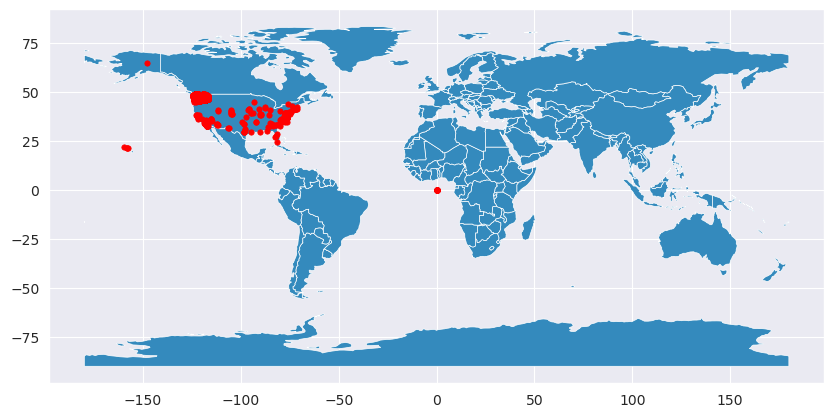

In [61]:
geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]
gdf = GeoDataFrame(df, geometry=geometry)
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red',markersize=15);

In [62]:
df.head()

,VIN,County,City,State,PostalCode,ModelYear,Make,Model,Electric_Vehicle_Type,CAFV_Eligibility,...,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract,Year,Age,Electric_Utility_Category,lat,lon,geometry
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,476647986,POINT (-76.42443 36.8752),Utility Not Avalilable,51800075203.0,2018,5,Not Available,-76.42443,36.87520,POINT (-76.42443 36.87520)
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,103490145,POINT (-120.56916 46.58514),PACIFICORP,53077000401.0,2020,3,Only One Option,-120.56916,46.58514,POINT (-120.56916 46.58514)
2,WA1LAAGE7M,Yakima,Yakima,WA,98908,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,144941534,POINT (-120.56916 46.58514),PACIFICORP,53077002801.0,2021,2,Only One Option,-120.56916,46.58514,POINT (-120.56916 46.58514)
3,5YJ3E1EA1K,Danville,Danville,VA,24541,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,168513922,POINT (-79.4172 36.58598),Utility Not Avalilable,51590001100.0,2019,4,Not Available,-79.41720,36.58598,POINT (-79.41720 36.58598)
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,150749378,POINT (-76.21549 36.92478),Utility Not Avalilable,51710006502.0,2014,9,Not Available,-76.21549,36.92478,POINT (-76.21549 36.92478)


import geopandas as gpd
import folium

# Load the shapefile of Washington ZIP codes
zipcodes = gpd.read_file('/kaggle/input/zpcdus')

# Calculate the total number of electric vehicles registered in each ZIP code
ev_count = df.groupby('PostalCode')['VIN'].nunique().reset_index()
ev_count.columns = ['PostalCode', 'EV Count']

# Merge the ZIP code shapefile with the EV count data
zipcodes = zipcodes.merge(ev_count, on='ZCTA5CE10', how='left')

# Calculate the number of charging stations in each ZIP code
charging_count = df.groupby('PostalCode')['Charging'].sum().reset_index()
charging_count.columns = ['PostalCode', 'Charging Count']

# Merge the ZIP code shapefile with the charging count data
zipcodes = zipcodes.merge(charging_count, on='PostalCode', how='left')

# Create a choropleth map using folium
m = folium.Map(location=[zipcodes['Latitude'].mean(), zipcodes['Longitude'].mean()], zoom_start=10)

folium.Choropleth(
    geo_data=zipcodes,
    name='Electric Vehicle Adoption',
    data=zipcodes,
    columns=['PostalCode', 'EV Count'],
    key_on='feature.properties.ZIP_CODE',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Electric Vehicle Count'
).add_to(m)

folium.Choropleth(
    geo_data=zipcodes,
    name='Charging Infrastructure',
    data=zipcodes,
    columns=['PostalCode', 'Charging Count'],
    key_on='feature.properties.ZIP_CODE',
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Charging Station Count'
).add_to(m)

folium.LayerControl().add_to(m)

m


display(zipcodes)
print(zipcodes.columns)
df['PostalCode'].unique
print(df['CAFV_Eligibility'].unique())
